Given code that can extract the contents of the inner rectangles (boxes), we can determine whether the 
contents have changed.

Here, we try a method of determining the amount of ink in each box.  

In [1]:
LIVENOTEBOOK = False
import cv2
cv2.__version__



'3.3.0-dev'

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim 
def imshow(img):  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
if LIVENOTEBOOK:
    %matplotlib inline
    img = cv2.imread("../reference/frame17978.png")
    # test plotting
    imshow(img)

In [39]:
def threshold_boxes(boxes):
    """Given a list of images, adaptive threshold each image"""
    output = []
    for img in boxes:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        dst = cv2.adaptiveThreshold(img, 160, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)
        output.append(dst)
    return output


Found 5 outer contours
Found shape with sides: 13
Found shape with sides: 13
Found shape with sides: 10
Found shape with sides: 4
-- Rejected rectangle: 2 x 9
Found shape with sides: 4
-- Found: 445 x 409


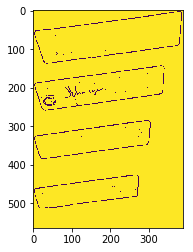

In [63]:
%matplotlib inline
box1full = get_contents("../reference/frame18073.png") 
box1full_th = threshold_boxes(box1full)
plt.imshow(np.concatenate(box1full_th))

Found 5 outer contours
Found shape with sides: 13
Found shape with sides: 13
Found shape with sides: 10
Found shape with sides: 4
-- Rejected rectangle: 2 x 9
Found shape with sides: 4
-- Found: 445 x 409


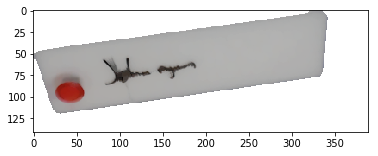

In [70]:
#try something else: first morph then substrction
jr = get_contents("../reference/frame18073.png")[1] 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
jr = cv2.morphologyEx(jr, cv2.MORPH_OPEN, kernel)
imshow(jr)

Found 5 outer contours
Found shape with sides: 12
Found shape with sides: 17
Found shape with sides: 11
Found shape with sides: 6
Found shape with sides: 4
-- Found: 445 x 409


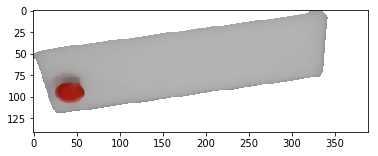

In [71]:
empty = get_contents("../reference/frame18074.png")[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
empty = cv2.morphologyEx(empty, cv2.MORPH_OPEN, kernel)
imshow(empty)

In [73]:
compare_ssim(jr, empty, multichannel=True)


0.95049821074410745

0.436141
(141, 389, 3)


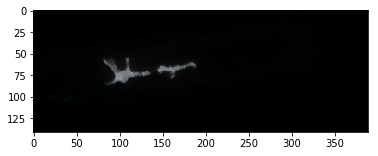

In [122]:
diff = cv2.absdiff(jr, empty)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, kernel)
print (diff.sum()/1e6)
print(diff.shape)
imshow(diff)

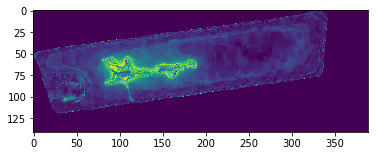

In [92]:

contentmask = np.sqrt(np.sum(diff**2, axis=2))
plt.imshow(contentmask)

Found 6 outer contours
Found shape with sides: 7
Found shape with sides: 16
Found shape with sides: 17
Found shape with sides: 8
Found shape with sides: 7
Found shape with sides: 4
-- Found: 445 x 410


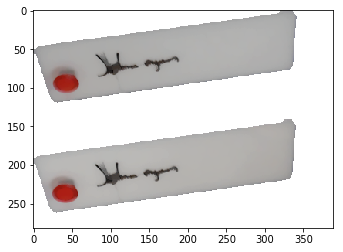

In [107]:
same = get_contents("../reference/frame18059.png")[1] # same only in box1
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
same = cv2.morphologyEx(same, cv2.MORPH_OPEN, kernel)
same = same[:,1:390,:] # crop to size of JR TODO

imshow(np.concatenate([jr, same], axis=0))


0.565449


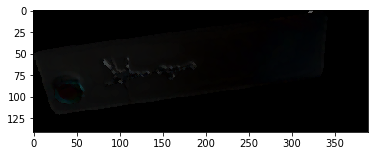

In [121]:

diff2 = cv2.absdiff(jr, same)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
diff2 = cv2.morphologyEx(diff2, cv2.MORPH_OPEN, kernel)
#contentmask2 = np.sqrt(np.sum(diff2**2, axis=2))
#plt.imshow(contentmask2)
print (diff2.sum()/1e6)
imshow(diff2)
#print (same.shape, jr.shape)